<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout14_PartA_Importance_of_Predictors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #14 - Part A: Understanding the Importance of Individual Predictor Variables

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## MN Gay Marriage Amendment

Consider the following data collected on counties from all across Minnesota.  The goal here is to investigate the relationship between the outcome from the 2012 ballot measure to restrict marriage between a man and women in the State of MN and various demographics. 

<u>Note:</u> A vote of 'Yes" indicates marriage should be only be defined as the union of one man and one women.
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li>Response Variable: Percent Voted Yes for Amendment #1</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>% Voted Democrat</li>
          <li>% Voted Republican</li>
          <li>Population Per Square Mile</li>
          <li>Per Capita Income</li>
          <li>Average Household Size</li>
          <li>% Bachelor or higher Education</li>
          <li>% Unemployment</li>
          <li>% Population Living in Poverty</li>
          <li>% of Population: Age 0-17</li>
          <li>% of Population: Age 18-24</li>
          <li>% of Population: Age 25-44</li>
          <li>% of Population: Age 45-64</li>
          <li>% of Population: Age 65 and Over</li>
          <li>% of Population: White</li>
          <li>% of Population: African American</li>
          <li>% of Population: American Indian</li>
          <li>% of Population: Asian</li>
          <li>% of Population: Other</li>
          <li>% of Population: Of Hispanic Origin</li>
         </ul>
     </ul>
    </td>
    <td width='50%'>
    <p align='center'><img src="https://drive.google.com/uc?export=view&id=1yat57mNueWJ95pux9YstUjp2JuTc7E9t" width="50%" height="50%"></img></p>
      
  </td>
</tr>

</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>




## Load tidyverse

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [1]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()





---




## Load the initial data

In [2]:
# Reading data in using read_csv 
MN_Marriage_Amendment <- read_csv("http://www.StatsClass.org/stat360/Datasets/MN_Marriage_Amendment.csv")

Rows: 87 Columns: 23

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): State, County
dbl (21): FIPSCode, Pct_Yes, Pct_Democrat, Pct_Republican, PopPerSqMile, Per...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Taking a quick look at the initial data...

In [3]:
head(MN_Marriage_Amendment)

FIPSCode,State,County,Pct_Yes,Pct_Democrat,Pct_Republican,PopPerSqMile,PerCapitaIncome,AvgHousehold Size,Pct_Bachelororhigher,⋯,Pct_Age18to24,Pct_Age25to44,Pct_Age45to64,Pct_Age65andOlder,Pct_RaceWhite,Pct_RaceAfricanAmerican,Pct_RaceAmericanIndian,Pct_RaceAsian,Pct_RaceOther,Pct_Hispanic
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27001,MN,"Aitkin County, MN",61.82,48.4,49.8,8.9,24694,2.06,15.1,⋯,5.1,16.9,32.8,28.5,96,0.4,2.4,0.2,0.2,0.9
27003,MN,"Anoka County, MN",50.61,47.7,50.3,782.1,29894,2.70,25.8,⋯,8.1,27.8,28.4,10.8,87,4.0,1.0,4.0,1.5,3.6
27005,MN,"Becker County, MN",62.92,41.8,56.4,24.7,25233,2.38,21.4,⋯,6.8,21.7,29.5,18.3,88,0.4,8.0,0.4,0.3,1.2
27007,MN,"Beltrami County, MN",51.08,53.8,43.9,17.7,21753,2.56,29.1,⋯,14.6,22.3,25.1,13.7,75,0.6,20.0,0.7,0.3,1.5
27009,MN,"Benton County, MN",55.39,41.9,55.6,94.2,23924,2.48,18.8,⋯,10.7,28.5,24.2,12.8,95,1.9,0.4,1.1,0.4,1.6
27011,MN,"Big Stone County, MN",67.05,48.3,49.8,10.6,24960,2.15,16.8,⋯,5.6,18.4,29.8,25.4,98,0.2,0.4,0.1,0.3,0.8




---



---



## Correlation Analysis

A complete correlation analysis should be conducted to avoid issues related to multicollinearity.

In [6]:
cor(MN_Marriage_Amendment[,4:23])

,Pct_Yes,Pct_Democrat,Pct_Republican,PopPerSqMile,PerCapitaIncome,AvgHousehold Size,Pct_Bachelororhigher,Pct_Unemployment,Pct_Poverty,Pct_Age0to17,Pct_Age18to24,Pct_Age25to44,Pct_Age45to64,Pct_Age65andOlder,Pct_RaceWhite,Pct_RaceAfricanAmerican,Pct_RaceAmericanIndian,Pct_RaceAsian,Pct_RaceOther,Pct_Hispanic
Pct_Yes,1.00000000,-0.64541723,0.64855039,-0.53041263,-0.58523594,-0.22417766,-0.80645228,-0.13263376,0.021101708,0.05515810,-0.4696915847,-0.51759911,0.197154870,0.56205416,0.35410407,-0.62448520,-0.0427026098,-0.49015819,0.06715177,0.033356164
Pct_Democrat,-0.64541723,1.00000000,-0.99894342,0.37191654,0.11144680,-0.22015197,0.33506309,0.06280675,0.325941638,-0.36309429,0.2898317955,-0.02059607,0.016021439,-0.01768341,-0.40693647,0.39436745,0.2340664416,0.25613803,0.05432809,0.081442613
Pct_Republican,0.64855039,-0.99894342,1.00000000,-0.36857228,-0.10841808,0.22121860,-0.33302413,-0.06055333,-0.320401128,0.36874121,-0.2960284709,0.01717944,-0.014030942,0.02074151,0.39367509,-0.39157020,-0.2237497669,-0.25029886,-0.04548360,-0.073722569
PopPerSqMile,-0.53041263,0.37191654,-0.36857228,1.00000000,0.47466412,0.15928657,0.55810156,0.08051932,0.071474101,0.09151799,0.1426364281,0.43221398,-0.186763792,-0.35790885,-0.47722039,0.87190275,-0.0636921085,0.80909140,0.15702456,0.156402530
PerCapitaIncome,-0.58523594,0.11144680,-0.10841808,0.47466412,1.00000000,0.27115894,0.79479494,-0.19078697,-0.576850914,0.20689757,-0.0796496181,0.53901582,0.014376326,-0.41245387,-0.08533944,0.53232438,-0.2703393380,0.52365535,0.02447708,0.024872262
AvgHousehold Size,-0.22417766,-0.22015197,0.22121860,0.15928657,0.27115894,1.00000000,0.31680898,0.10079381,-0.273606313,0.81791868,0.1871776871,0.74131029,-0.567426180,-0.81782806,-0.29735936,0.26925262,0.0623172436,0.33859399,0.21935603,0.243390772
Pct_Bachelororhigher,-0.80645228,0.33506309,-0.33302413,0.55810156,0.79479494,0.31680898,1.00000000,-0.10974819,-0.208758733,0.13361938,0.3738054888,0.55709983,-0.264881498,-0.58926856,-0.34647139,0.67307644,-0.0515096583,0.64673209,0.01824289,0.024232629
Pct_Unemployment,-0.13263376,0.06280675,-0.06055333,0.08051932,-0.19078697,0.10079381,-0.10974819,1.00000000,0.373032871,0.08185164,-0.1159618192,0.08094233,0.116076608,-0.05005931,-0.21768385,0.02054073,0.3071730600,-0.07896740,-0.13597407,-0.110579303
Pct_Poverty,0.02110171,0.32594164,-0.32040113,0.07147410,-0.57685091,-0.27360631,-0.20875873,0.37303287,1.000000000,-0.31396539,0.3133029818,-0.36748104,-0.060441452,0.20680364,-0.45287528,0.04911566,0.5444738928,-0.06806232,-0.01966482,-0.001461885
Pct_Age0to17,0.05515810,-0.36309429,0.36874121,0.09151799,0.20689757,0.81791868,0.13361938,0.08185164,-0.313965391,1.00000000,-0.1734116084,0.65387694,-0.481398857,-0.62662253,-0.29143896,0.12666305,0.1513794466,0.23314888,0.19417292,0.222426981




---



---



## Initial Model

The initial model:  $PctYes \sim PctRepublican + PerCapitaIncome + PctBachelorHigher + PctUnemployment + PctPoverty + PctAge0to17 + PctAge18to24 + PctAge45to64 + PctAge65andOlder + PctRaceWhite + PctRaceAfricanAmerican + PctRaceAmericanIndian + PctRaceOther$


<u>Note</u>:  Some of the available predictors are excluded from this initial model due to issues related to multicollinarity. 

In [7]:
#Fitting an initial model
Model_Initial <- lm(Pct_Yes ~ Pct_Republican 
                              + PerCapitaIncome + Pct_Bachelororhigher 
                              + Pct_Unemployment + Pct_Poverty 
                              + Pct_Age0to17 + Pct_Age18to24 + Pct_Age45to64 + Pct_Age65andOlder
                              + Pct_RaceWhite + Pct_RaceAfricanAmerican + Pct_RaceAmericanIndian + Pct_RaceOther ,
                              data=MN_Marriage_Amendment
                   )
summary(Model_Initial)


Call:
lm(formula = Pct_Yes ~ Pct_Republican + PerCapitaIncome + Pct_Bachelororhigher + 
    Pct_Unemployment + Pct_Poverty + Pct_Age0to17 + Pct_Age18to24 + 
    Pct_Age45to64 + Pct_Age65andOlder + Pct_RaceWhite + Pct_RaceAfricanAmerican + 
    Pct_RaceAmericanIndian + Pct_RaceOther, data = MN_Marriage_Amendment)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3185 -1.4731 -0.0521  1.4843  6.4936 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             18.8512110 41.6679373   0.452  0.65231    
Pct_Republican           0.5268397  0.0520197  10.128 1.48e-15 ***
PerCapitaIncome         -0.0005900  0.0002270  -2.599  0.01129 *  
Pct_Bachelororhigher    -0.3185019  0.1030311  -3.091  0.00282 ** 
Pct_Unemployment        -1.6493002  0.3258654  -5.061 3.01e-06 ***
Pct_Poverty              0.1833830  0.1831922   1.001  0.32011    
Pct_Age0to17             1.1719541  0.4567580   2.566  0.01235 *  
Pct_Age18to24            0.0003671  0.33

### Getting the t-value for significance

In [8]:
qt(0.05/2, df=73, lower.tail = FALSE)

[1] 1.992997

### Getting the t-values into a data.frame for plotting

In [14]:
#Getting the absolute t values from the model object
tvalue_df <- data.frame(tvalues = abs(summary(Model_Initial)$coefficients[,3]))

#Add a column for the predictor names
tvalue_df$Predictor <- rownames(tvalue_df)

#Print the data.frame out for inspection
tvalue_df

,tvalues,Predictor
,<dbl>,<chr>
(Intercept),0.452415268,(Intercept)
Pct_Republican,10.127699521,Pct_Republican
PerCapitaIncome,2.599412526,PerCapitaIncome
Pct_Bachelororhigher,3.091319136,Pct_Bachelororhigher
Pct_Unemployment,5.061292286,Pct_Unemployment
Pct_Poverty,1.001041670,Pct_Poverty
Pct_Age0to17,2.565809804,Pct_Age0to17
Pct_Age18to24,0.001096923,Pct_Age18to24
Pct_Age45to64,0.456033390,Pct_Age45to64


### Making a Variable Importance Plot

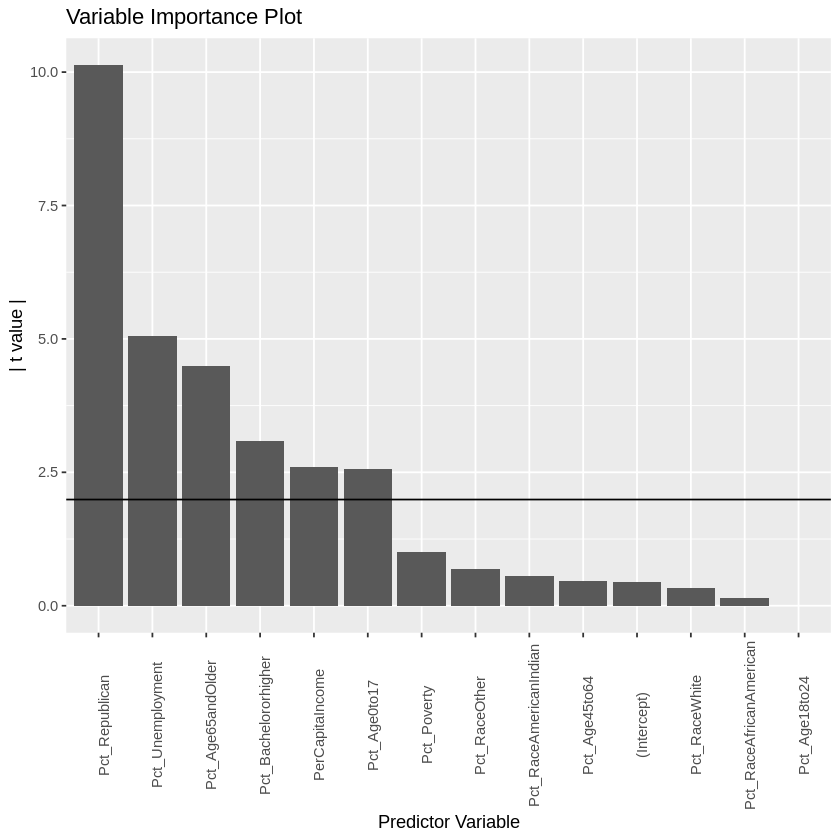

In [13]:
ggplot(tvalue_df, aes(x=reorder(Predictor,-tvalues), y=tvalues))+
 geom_bar(stat="identity") +
 theme(axis.text.x=element_text(angle=90)) +
 labs(title="Variable Importance Plot",
        x ="Predictor Variable", y = "| t value |") + 
 geom_hline(yintercept=1.99)  #Bars above this line are statistically significant



---



---



End of Document